In [2]:
import os 
import glob
import codecs
import re
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams["font.size"] = 13

In [4]:
!ls ../

3He2000001.mca                     test00256.mca
3He2000002.mca                     test00257.mca
3He2000003.mca                     test00258.mca
3He2000004.mca                     test00259.mca
3He2000005.mca                     test00260.mca
3He2000006.mca                     test00261.mca
3He2000007.mca                     test00262.mca
3He3000001.mca                     test00263.mca
3He3000002.mca                     test00264.mca
3He3000003.mca                     test00265.mca
3He3000004.mca                     test00266.mca
3He3000005.mca                     test00267.mca
3He3000006.mca                     test00268.mca
3He3000007.mca                     test00269.mca
3He4000001.mca                     test00270.mca
3He4000002.mca                     test00271.mca
3He4000003.mca                     test00272.mca
3He4000004.mca                     test00273.mca
3He4000005.mca                     test00274.mca
3He4000006.mca                     test00275.mca
3He4000007.mca      

In [5]:
def calc(spectra,livetime):
    return spectra/livetime

In [6]:
#filename = 'GAGG_0_00'

def spec(filename):
    filepath = '../' + filename + '*.mca'
    file_list = glob.glob(filepath)#, recursive=True)
    """
    rate = plt.figure(figsize=(12,8))
    ax_rate = rate.add_subplot(111)
    ax_rate.set_xlabel('date')
    ax_rate.set_ylabel('rate[/s]')
    ax_rate.set_yscale('log')
    ax_rate.grid()

    spec = plt.figure(figsize=(12,8))
    ax_spec = spec.add_subplot(111)
    ax_spec.set_xlabel('channel')
    ax_spec.set_ylabel('rate[/s]')
    ax_spec.set_yscale('log')
    ax_spec.grid()

    sumspec = plt.figure(figsize=(12,8))
    ax_sum = sumspec.add_subplot(111)
    ax_sum.set_xlabel('channel')
    ax_sum.set_ylabel('rate[/s]')
    #ax_sum.set_yscale('log')
    ax_sum.grid()
    """

    sum_spectra=[0]*1024
    sum_livetime=0

    for file_path in file_list:

        #print(file_path)
        with codecs.open(file_path, 'r', 'utf-8', 'ignore') as file:
            lines = file.readlines()

            spectrum=[]
            flag=False
            draw=False

            #sum_spectra=[0]*bins

            for line in lines:
                if 'LIVE_TIME' in line:
                    livetime = float(re.sub(r"[^\d.]", "", line))
                    sum_livetime += livetime
                if 'START_TIME' in line:
                    runstart = line[14:-2]
                    runstart = datetime.datetime.strptime(runstart, '%m/%d/%Y %H:%M:%S')
                    #runend = runstart + datetime.timedelta(seconds=livetime)
                    #start = datetime.date(start.year, start.month, start.day)
                if '<<DATA>>' in line:
                    flag=True
                    continue
                elif '<<END>>' in line:
                    flag=False
                    break

                if flag:
                    #print(line)
                    spectrum.append(int(re.sub(r"\D", "", line)))

            bins = len(spectrum)
            counts = sum(spectrum)

            #ax_rate.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%H:%M'))	
            #ax_spec.plot(range(0,bins),spectrum,label=runstart)
            sum_spectra=[spectrum+sum_spectra for (spectrum,sum_spectra) in zip(spectrum,sum_spectra)]
                #print(sum_spectra)

            #ax_sum.plot(range(0,bins),sum_spectra)
            #ax_spec.legend()
            def calc(n):
                return n/sum_livetime
            
            normed_spectra = list(map(calc, sum_spectra))
    
    return normed_spectra

In [7]:
def draw_cal(data,label):
    plt.plot(np.arange(len(data))*8.11818e-03+2.26694e-02,data,label=label)

In [8]:
def draw(data,label):
    plt.plot(np.arange(len(data)),data,label=label)

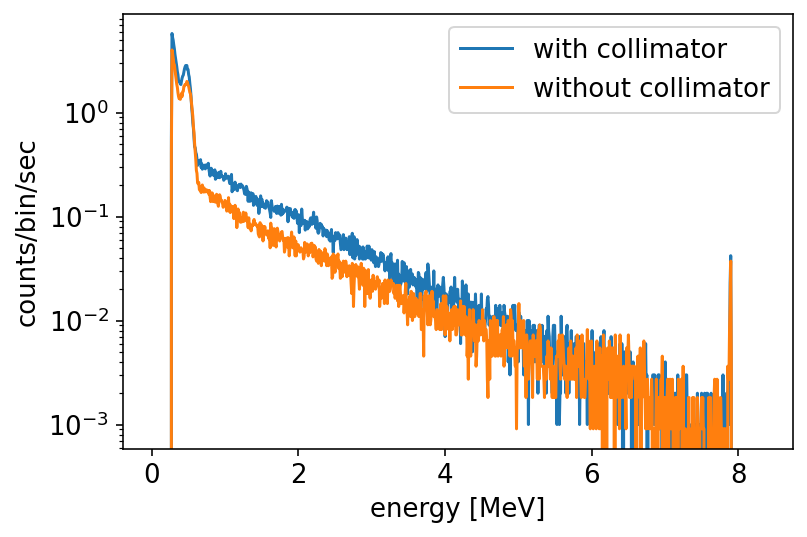

In [21]:
draw_cal(spec('GAGG_0_collimated_retake'),'with collimator')
#draw_cal(spec('GAGG_60_collimated_xe'),'with xe chamber')
draw_cal(spec('GAGG_0_0'),'without collimator')
plt.legend()
plt.xlabel('energy [MeV]')
#plt.xlim(1,8)
plt.ylabel('counts/bin/sec')
plt.yscale('log')

In [10]:
sum(spec('GAGG_0_'))

121.23166666666586

In [11]:
sum(spec('GAGG_0_collimated_retake'))

143.64999999999918

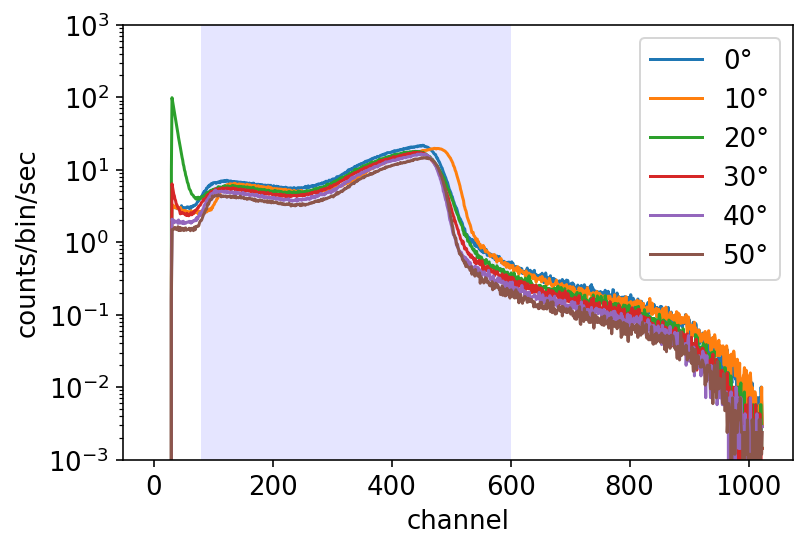

In [138]:
draw(spec('3He_0_retake'),'0°')
draw(spec('3He_10_0'),'10°')
draw(spec('3He200'),'20°')
draw(spec('3He300'),'30°')
draw(spec('3He400'),'40°')
draw(spec('3He500'),'50°')
plt.yscale('log')
plt.axvspan(80, 600, facecolor='blue', alpha=0.1)
plt.ylim(1e-3,1e3)
plt.xlabel('channel')
plt.ylabel('counts/bin/sec')
#plt.plot([80,80],[1,1e4],c='black')
#plt.plot([600,600],[1,1e4],c='black')
plt.legend()

(0.0, 30.0)

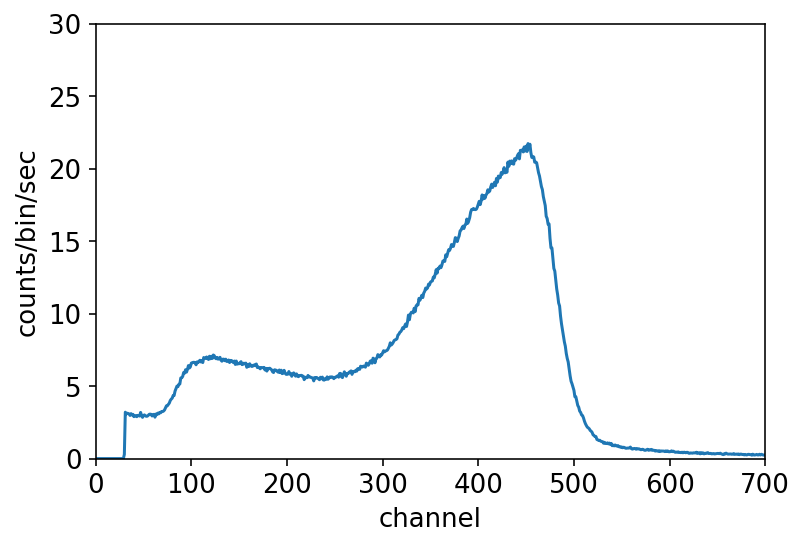

In [119]:
draw(spec('3He_0_retake'),'0°')
plt.xlabel('channel')
plt.ylabel('counts/bin/sec')
plt.xlim(0,700)
plt.ylim(0,30)

(0.0, 700.0)

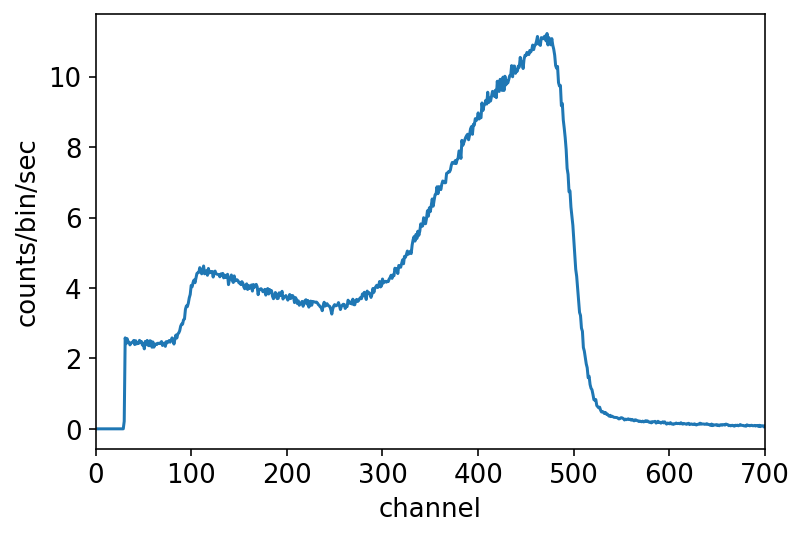

In [118]:
draw(spec('3He_0_collimated'),'0°')
plt.xlabel('channel')
plt.ylabel('counts/bin/sec')
plt.xlim(0,700)

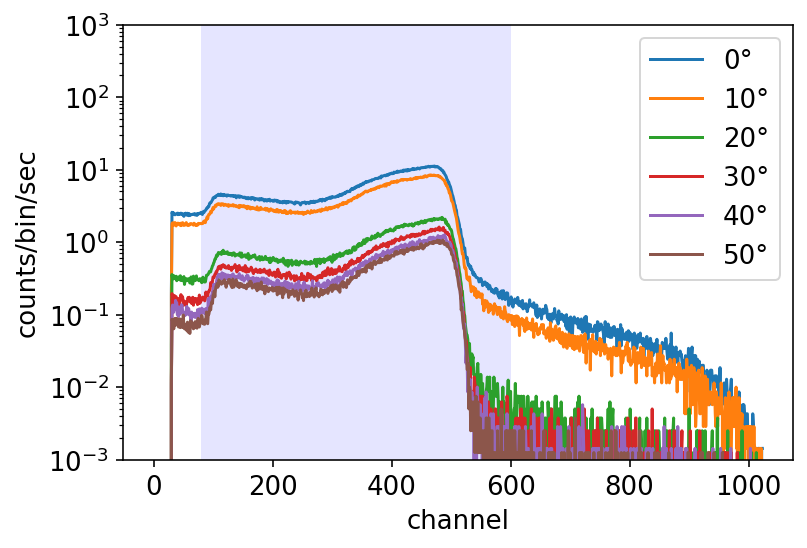

In [139]:
draw(spec('3He_0_collimated_'),'0°')
draw(spec('3He_10_collimated_'),'10°')
draw(spec('3He_20_collimated_'),'20°')
draw(spec('3He_30_collimated_'),'30°')
draw(spec('3He_40_collimated_'),'40°')
draw(spec('3He_50_collimated_'),'50°')
#plt.plot([80,80],[1e-3,1e4],c='black')
#plt.plot([600,600],[1e-3,1e4],c='black')
plt.axvspan(80, 600, facecolor='blue', alpha=0.1)
plt.xlabel('channel')
plt.ylabel('counts/bin/sec')
#plt.axvspan(0, 80, facecolor='black', alpha=0.1)
plt.ylim(1e-3,1e3)
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'counts [/sec]')

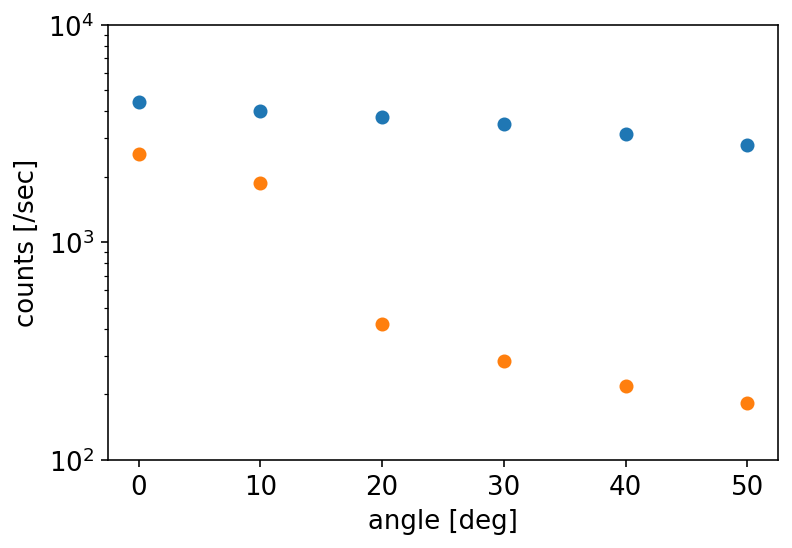

In [165]:
plt.scatter(0,sum(spec('3He_0_retake')[80:600]),c='C0')
plt.scatter(10,sum(spec('3He_10_0')[80:600]),c='C0')
plt.scatter(20,sum(spec('3He200')[80:600]),c='C0')
plt.scatter(30,sum(spec('3He300')[80:600]),c='C0')
plt.scatter(40,sum(spec('3He400')[80:600]),c='C0')
plt.scatter(50,sum(spec('3He500')[80:600]),c='C0')

plt.scatter(0,sum(spec('3He_0_collimated_')[80:600]),c='C1')
plt.scatter(10,sum(spec('3He_10_collimated_')[80:600]),c='C1')
plt.scatter(20,sum(spec('3He_20_collimated_')[80:600]),c='C1')
plt.scatter(30,sum(spec('3He_30_collimated_')[80:600]),c='C1')
plt.scatter(40,sum(spec('3He_40_collimated_')[80:600]),c='C1')
plt.scatter(50,sum(spec('3He_50_collimated_')[80:600]),c='C1')

plt.yscale('log')
#plt.grid(axis='y')
plt.ylim(1e2,1e4)
plt.xlabel('angle [deg]')
plt.ylabel('counts [/sec]')

Text(0, 0.5, 'ratio')

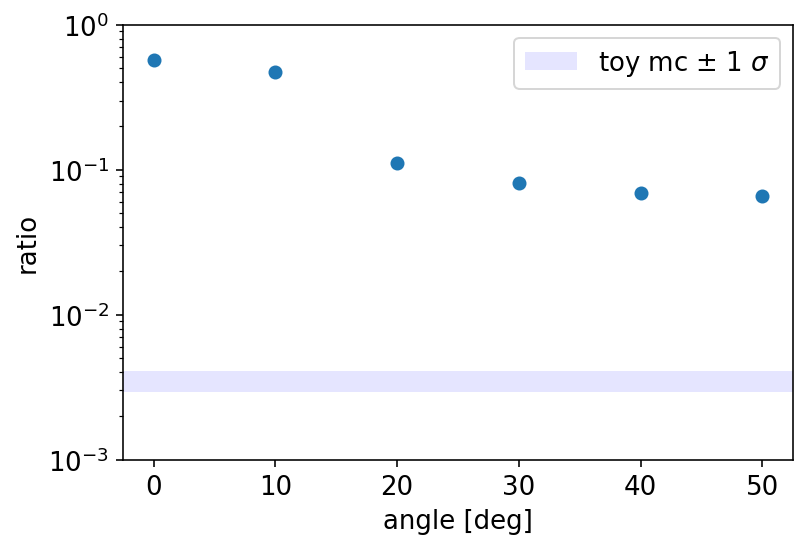

In [17]:
plt.scatter(0,sum(spec('3He_0_collimated_')[80:600])/sum(spec('3He_0_retake')[80:600]),c='C0')
plt.scatter(10,sum(spec('3He_10_collimated_')[80:600])/sum(spec('3He_10_0')[80:600]),c='C0')
plt.scatter(20,sum(spec('3He_20_collimated_')[80:600])/sum(spec('3He200')[80:600]),c='C0')
plt.scatter(30,sum(spec('3He_30_collimated_')[80:600])/sum(spec('3He300')[80:600]),c='C0')
plt.scatter(40,sum(spec('3He_40_collimated_')[80:600])/sum(spec('3He400')[80:600]),c='C0')
plt.scatter(50,sum(spec('3He_50_collimated_')[80:600])/sum(spec('3He500')[80:600]),c='C0')
#plt.grid()
plt.ylim(1e-3,1)
mc=35/10000
error=np.sqrt(35)/10000
plt.axhspan(mc-error, mc+error, facecolor='blue', alpha=0.1,label=r'toy mc $\pm$ 1 $\sigma$')
plt.legend()
plt.yscale('log')
plt.xlabel('angle [deg]')
plt.ylabel('ratio')

In [18]:
error

0.0005916079783099616

In [91]:
file_list

['../GAGG_0_00009.mca',
 '../GAGG_0_00008.mca',
 '../GAGG_0_00006.mca',
 '../GAGG_0_00007.mca',
 '../GAGG_0_00005.mca',
 '../GAGG_0_00011.mca',
 '../GAGG_0_00010.mca',
 '../GAGG_0_00004.mca',
 '../GAGG_0_00001.mca',
 '../GAGG_0_00003.mca',
 '../GAGG_0_00002.mca']